# Librerias

In [1]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as math

from glob import glob
from collections import OrderedDict
from scipy.optimize import least_squares
from scipy.optimize import curve_fit
from lmfit.models import ConstantModel, LorentzianModel
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter

# Funciones

In [2]:
def gauss(X,X_mean,sigma,C):
  return C*np.exp(-(X-X_mean)**2/(2*sigma**2))

def ploteo_gauss(dt_x, dt_y, y_error, mu_ploteo, sigma_ploteo, C_ploteo, color_ploteo, label_ploteo, x_label, y_label, rtrn=False):

  pop_ploteo, cov_ploteo= curve_fit(f=gauss, xdata= dt_x, ydata= dt_y, p0=[mu_ploteo,sigma_ploteo,C_ploteo], sigma=y_error, maxfev=1000000)

  mu=round(pop_ploteo[0],0)
  sigma=pop_ploteo[1]
  C=pop_ploteo[2]

  fig,ax = plt.subplots()
  plt.errorbar(dt_x,dt_y, yerr=y_error, fmt=".:" , color=color_ploteo , label=label_ploteo)
  plt.plot(dt_x,gauss(dt_x, mu, sigma, C),color='gold')
  plt.vlines(mu, ymin=0, ymax= max(dt_y), color= "red" )
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend()
  plt.show()

  print('El maximo es en el canal: ', round(mu,0), 'y el sigma es: ', sigma, 'La constante C es: ', C)
  print('Las incertezas son: ', np.sqrt(np.diag(cov_ploteo)))


  if rtrn==False:
    return

  elif rtrn==True:
    return mu, sigma, C, np.sqrt(np.diag(cov_ploteo))


def Doble_gauss(X, X_mean1, sigma1, C1, X_mean2, sigma2, C2):
    return C1*np.exp(-(X-X_mean1)**2/(2*sigma1**2)) + C2*np.exp(-(X-X_mean2)**2/(2*sigma2**2))

def ploteo_Doble_gauss(dt_x, dt_y, y_error, mu_ploteo1, sigma_ploteo1, C_ploteo1, mu_ploteo2, sigma_ploteo2, C_ploteo2, color_ploteo, label_ploteo, x_label, y_label, rtrn=False):

  pop_ploteo, cov_ploteo= curve_fit(f=Doble_gauss, xdata= dt_x, ydata= dt_y, sigma=y_error, p0=[mu_ploteo1, sigma_ploteo1, C_ploteo1, mu_ploteo2, sigma_ploteo2, C_ploteo2], maxfev=1000000)

  mu1=pop_ploteo[0]
  sigma1=pop_ploteo[1]
  C1=pop_ploteo[2]

  mu2=pop_ploteo[3]
  sigma2=pop_ploteo[4]
  C2=pop_ploteo[5]

  fig,ax = plt.subplots()
  plt.errorbar(dt_x,dt_y, yerr=y_error, fmt=".:" , color=color_ploteo , label=label_ploteo)
  plt.plot(dt_x,Doble_gauss(dt_x, mu1, sigma1, C1, mu2, sigma2, C2),color='gold')
  plt.vlines(mu1, ymin=0, ymax= max(dt_y), color= "red" )
  plt.vlines(mu2, ymin=0, ymax= max(dt_y), color= "red" )
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend()
  plt.show()

  print('El maximo 1 esta en: ', mu1, 'y el sigma es: ', sigma1, 'La constante C es: ', C1)
  print('El maximo 2 esta en: ', mu2, 'y el sigma es: ', sigma2, 'La constante C es: ', C2)
  print('Las incertezas son: ', np.sqrt(np.diag(cov_ploteo)))

  return

# Datos

In [3]:
Rutas=glob('D:\Genaro\Experimentos Cuanticos II\Exp.-Cuanticos-II\TP3- Fluorecencia\Datos\*.mca')

Datos={}

for ruta in Rutas:

    archivo_completo= os.path.basename(ruta)
    nombre_archivo= os.path.splitext(archivo_completo)[0]

    array=pd.read_csv(ruta, encoding='latin1', header=19, names=['data'], nrows=2048)
    array_norm=array['data']/max(array['data'])

    Colum_Errores= np.sqrt(array['data'])
    err_norm=Colum_Errores/max(array['data'])
    
    Datos[nombre_archivo]=[array['data'], Colum_Errores, array_norm, err_norm]

Co_dat=Datos['Co']
Cu_dat=Datos['Cu']
Mn_dat=Datos['Mn']
Ni_dat=Datos['Ni']
Incog1=Datos['incognita.grupo1']
Incog2=Datos['Incognita 2']

indice=Datos.keys()

canales=np.arange(1,2049,1)

# Calibración

## Espectros

In [4]:
# plt.errorbar(canales, Ni_dat[2], yerr=Ni_dat[3], fmt='o', color='orange')
# plt.xlim(750,950)

# ploteo_gauss(canales[775:845],Ni_dat[2][775:845],Ni_dat[3][775:845], 810, 10, 1, 'red', 'ajuste simple', 'canales', 'Nientas')
# ploteo_gauss(canales[870:920],Ni_dat[2][870:920],Ni_dat[3][870:920], 890, 10, 1, 'red', 'ajuste simple', 'canales', 'Nientas')

Ni_Mus=[807, 892]
Ni_Klines=[7478.15, 8264.66]
Ni_Mus_err=[0.04316397, 0.14705299]

In [5]:
# plt.errorbar(canales, Mn_dat[2], yerr=Mn_dat[3], fmt='o', color='orange')
# plt.xlim(600,725)

# ploteo_gauss(canales[620:660],Mn_dat[2][620:660],Mn_dat[3][620:660], 640, 10, 1, 'red', 'ajuste simple', 'canales', 'Mnentas')
# ploteo_gauss(canales[680:740],Mn_dat[2][680:740],Mn_dat[3][680:740], 720, 10, 1, 'red', 'ajuste simple', 'canales', 'Mnentas')

Mn_Mus=[638, 701]
Mn_Klines=[5898.75, 6490.45]
Mn_Mus_err=[0.04316397, 0.14705299]

In [6]:
# plt.errorbar(canales, Cu_dat[2], yerr=Cu_dat[3], fmt='o', color='orange')
# plt.xlim(800,1000)

# ploteo_gauss(canales[850:900],Cu_dat[2][850:900],Cu_dat[3][850:900], 865, 10, 1, 'red', 'ajuste simple', 'canales', 'cuentas')
# ploteo_gauss(canales[920:1000],Cu_dat[2][920:1000],Cu_dat[3][920:1000], 965, 10, 1, 'red', 'ajuste simple', 'canales', 'cuentas')

Cu_Mus=[869, 961]
Cu_Klines=[8047.78, 8905.29]
Cu_Mus_err=[0.04316397, 0.14705299]

In [7]:
# plt.errorbar(canales, Co_dat[2], yerr=Co_dat[3], fmt='o', color='orange')
# plt.xlim(700,900)

# ploteo_gauss(canales[725:775],Co_dat[2][725:775],Co_dat[3][725:775], 750, 10, 1, 'red', 'ajuste simple', 'canales', 'cuentas')
# ploteo_gauss(canales[800:850],Co_dat[2][800:850],Co_dat[3][800:850], 825, 10, 1, 'red', 'ajuste simple', 'canales', 'cuentas')

Co_Mus=[749, 826]
Co_Klines=[6930.32, 7649.43]
Co_Mus_err=[0.04131984, 0.13320902]

## Ajuste

In [8]:
list_mus=np.array([749, 826, 869, 961, 638, 701, 807, 892])
list_lines=np.array([6930.32, 7649.43, 8047.78, 8905.29, 5898.75, 6490.45,7478.15, 8264.66])
list_names=[r'Co K_\alpha', r'Co K_\beta', r'Cu K_\alpha', r'Cu K_\beta', r'Mn K_\alpha', r'Mn K_\beta', r'Ni K_\alpha', r'Ni K_\beta']
list_color=['orange', 'orange', 'green', 'green', 'red', 'red', 'blue', 'blue']

9.303499880482857 -34.702466237209244


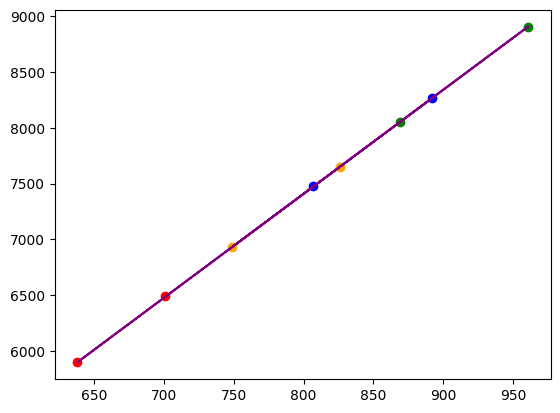

In [9]:
def lineal(x, p, b):
    y=x*p+b
    return y

pop_cal, cov_cal= curve_fit(lineal, list_mus, list_lines)

plt.plot(list_mus, lineal(list_mus, *pop_cal), color='purple')

for i in range(0,8):
    plt.scatter(list_mus[i], list_lines[i], color=list_color[i])

print(*pop_cal)

energias=pop_cal[0]* canales+pop_cal[1]

## Integrales Co y Ni

relacion de intesidades Nibre:  0.1192757584425891
centroides:  7479.693302104698 8269.893872745832
sigma y C, pico alpha (1):  71.23286604334804 0.9774473621902248


(7000.0, 8600.0)

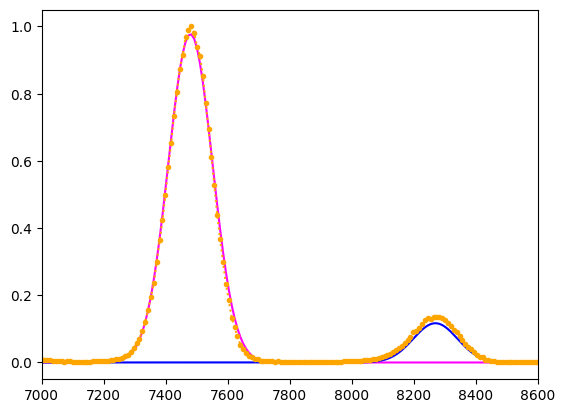

In [25]:
pop_Ni_p1, cov_Ni_p1= curve_fit(gauss, energias[780:820], Incog2[2][780:820], sigma=Incog2[3][780:820], p0=[7500,10,1])
pop_Ni_p2, cov_Ni_p2= curve_fit(gauss, energias[885:910], Incog2[2][885:910], sigma=Incog2[3][885:910], p0=[8290,20,1])

int_Ni_1=pop_Ni_p1[2]*pop_Ni_p1[1]*np.sqrt(2*np.pi)
int_Ni_2=pop_Ni_p2[2]*pop_Ni_p2[1]*np.sqrt(2*np.pi)

sigma_Ni_alpha=pop_Ni_p1[1]
sigma_Ni_beta=pop_Ni_p2[1]

mu_Ni_alpha=pop_Ni_p1[0]
mu_Ni_beta=pop_Ni_p2[0]

rel_C_Ni=pop_Ni_p2[2]/pop_Ni_p1[2]
rel_sigma_Ni=pop_Ni_p2[1]/pop_Ni_p1[1]

rel_int_Ni=int_Ni_2/int_Ni_1

print('relacion de intesidades Nibre: ', rel_int_Ni)
print('centroides: ', pop_Ni_p1[0], pop_Ni_p2[0])
print('sigma y C, pico alpha (1): ', pop_Ni_p1[1], pop_Ni_p1[2])

plt.errorbar(energias, Ni_dat[2], fmt='.:', color='orange')
plt.plot(energias, gauss(energias, *pop_Ni_p1), color='magenta')
plt.plot(energias, gauss(energias, *pop_Ni_p2), color='blue')
plt.xlim(7000,8600)

relacion de intesidades cobre:  0.14221969637430024
centroides:  6930.749477546712 7648.242899404307
sigma y C, pico alpha (1):  66.56472372954336 0.9878339509498348


(6600.0, 7800.0)

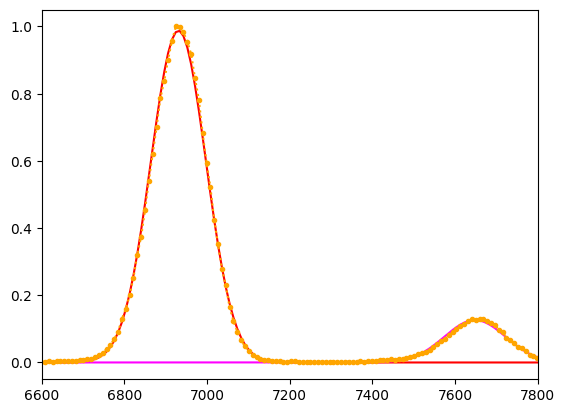

In [24]:
pop_Co_p1, cov_Co_p1= curve_fit(gauss, energias[720:770], Co_dat[2][720:770], sigma=Co_dat[3][720:770], p0=[6900,10,1])
pop_Co_p2, cov_Co_p2= curve_fit(gauss, energias[800:850], Co_dat[2][800:850], sigma=Co_dat[3][800:850], p0=[7500,10,1])

int_Co_1=pop_Co_p1[2]*pop_Co_p1[1]*np.sqrt(2*np.pi)
int_Co_2=pop_Co_p2[2]*pop_Co_p2[1]*np.sqrt(2*np.pi)

sigma_Co_alpha=pop_Co_p1[1]
sigma_Co_beta=pop_Co_p2[1]

mu_Co_alpha=pop_Co_p1[0]
mu_Co_beta=pop_Co_p2[0]

rel_C_Co=pop_Co_p2[2]/pop_Co_p1[2]
rel_sigma_Co=pop_Co_p2[1]/pop_Co_p1[1]

rel_int_Co=int_Co_2/int_Co_1

print('relacion de intesidades cobre: ', rel_int_Co)
print('centroides: ', pop_Co_p1[0], pop_Co_p2[0])
print('sigma y C, pico alpha (1): ', pop_Co_p1[1], pop_Co_p1[2])

plt.errorbar(energias, Co_dat[2], fmt='.:', color='orange')
plt.plot(energias, gauss(energias, *pop_Co_p1), color='red')
plt.plot(energias, gauss(energias, *pop_Co_p2), color='magenta')
plt.xlim(6600,7800)

# Análisis

## Incognita 2

(6700.0, 8500.0)

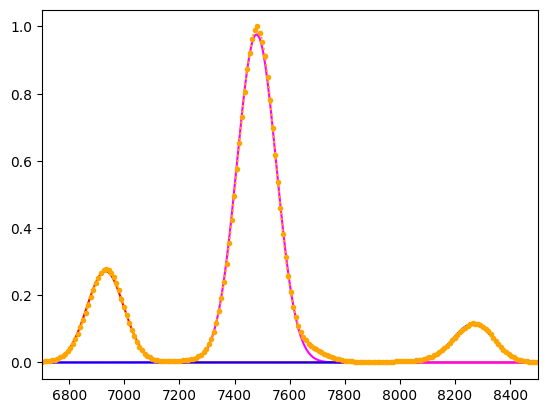

In [12]:
pop_I2_p1, cov_I2_p1= curve_fit(gauss, energias[720:770], Incog2[2][720:770], sigma=Incog2[3][720:770], p0=[6900,10,1])
pop_I2_p2, cov_I2_p2= curve_fit(gauss, energias[780:820], Incog2[2][780:820], sigma=Incog2[3][780:820], p0=[7500,10,1])
pop_I2_p3, cov_I2_p3= curve_fit(gauss, energias[875:910], Incog2[2][875:910], sigma=Incog2[3][875:910], p0=[8290,20,1])

int_I2_p1=pop_I2_p1[2]*pop_I2_p1[1]*np.sqrt(2*np.pi)
int_I2_p3=pop_I2_p3[2]*pop_I2_p3[1]*np.sqrt(2*np.pi)

rel_int_incog2=int_I2_p3/int_I2_p1

plt.errorbar(energias, Incog2[2], fmt='.:', color='orange')
plt.plot(energias, gauss(energias, *pop_I2_p1), color='red')
plt.plot(energias, gauss(energias, *pop_I2_p2), color='magenta')
plt.plot(energias, gauss(energias, *pop_I2_p3), color='blue')
plt.xlim(6700,8500)

In [26]:
def gauss_four(x, x1_Co, x2_Co, x1_Ni, x2_Ni, sigma1_Co, C1_Co, sigma1_Ni, C1_Ni):

    y= gauss(x, x1_Co, sigma1_Co, C1_Co)+gauss(x, x2_Co, rel_sigma_Co*sigma1_Co, rel_C_Co*C1_Co)+gauss(x, x1_Ni, sigma1_Ni, C1_Ni)+gauss(x, x2_Ni, rel_sigma_Ni*sigma1_Ni, rel_C_Ni*C1_Ni)

    return y

P0_incgo1=[6930,7648, 7479, 8269, 66.56, 0.99, 71.23, 0.98]

(6000.0, 9000.0)

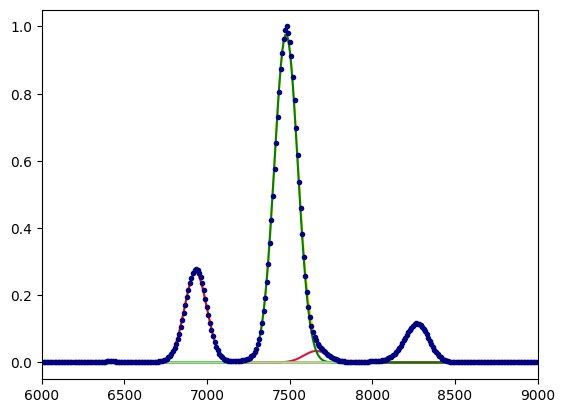

In [36]:
pop_sum_I2, cov_sum_I2= curve_fit(gauss_four, energias[720:910], Incog2[2][720:910], sigma=Incog2[3][720:910], p0=P0_incgo1)

gauss_Co_I2_1=[pop_sum_I2[0], pop_sum_I2[4], pop_sum_I2[5]]
gauss_Co_I2_2=[pop_sum_I2[1], rel_sigma_Co*pop_sum_I2[4], rel_C_Co*pop_sum_I2[5]]
gauss_Ni_I2_1=[pop_sum_I2[2], pop_sum_I2[6], pop_sum_I2[7]]
gauss_Ni_I2_2=[pop_sum_I2[3], rel_sigma_Ni*pop_sum_I2[6], rel_C_Ni*pop_sum_I2[7]]

plt.errorbar(energias, Incog2[2], fmt='.', color='navy')
plt.plot(energias, gauss_four(energias, *pop_sum_I2), color='gold')
plt.plot(energias, gauss(energias, *gauss_Co_I2_1), color='red')
plt.plot(energias, gauss(energias, *gauss_Co_I2_2), color='crimson')
plt.plot(energias, gauss(energias, *gauss_Ni_I2_1), color='green')
plt.plot(energias, gauss(energias, *gauss_Ni_I2_2), color='lightgreen')
plt.xlim(6000,9000)

## Incognita 1

proporciones picos 1 y 3: 83.06515131194688 16.934848688053115


(6700.0, 8500.0)

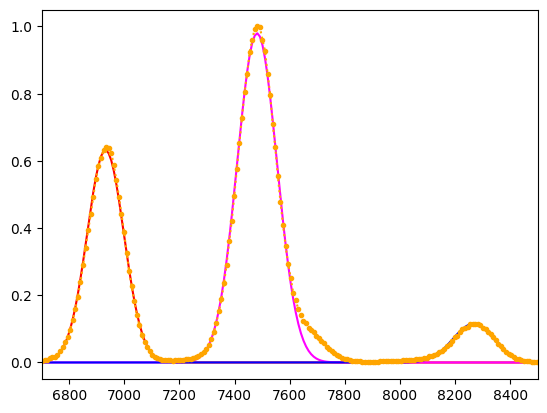

In [15]:
pop_I1_p1, cov_I1_p1= curve_fit(gauss, energias[720:770], Incog1[2][720:770], sigma=Incog2[3][720:770], p0=[6900,10,1])
pop_I1_p2, cov_I1_p2= curve_fit(gauss, energias[780:820], Incog1[2][780:820], sigma=Incog2[3][780:820], p0=[7500,10,1])
pop_I1_p3, cov_I1_p3= curve_fit(gauss, energias[875:910], Incog1[2][875:910], sigma=Incog2[3][875:910], p0=[8290,20,1])

int_I1_p1=pop_I1_p1[2]*pop_I1_p1[1]*np.sqrt(2*np.pi)
int_I1_p3=pop_I1_p3[2]*pop_I1_p3[1]*np.sqrt(2*np.pi)

prop_I1_p1=100*(int_I1_p1/(int_I1_p1+int_I1_p3))
prop_I1_p3=100*(int_I1_p3/(int_I1_p1+int_I1_p3))

print('proporciones picos 1 y 3:', prop_I1_p1, prop_I1_p3)

plt.errorbar(energias, Incog1[2], fmt='.:', color='orange')
plt.plot(energias, gauss(energias, *pop_I1_p1), color='red')
plt.plot(energias, gauss(energias, *pop_I1_p2), color='magenta')
plt.plot(energias, gauss(energias, *pop_I1_p3), color='blue')
plt.xlim(6700,8500)

(6000.0, 9000.0)

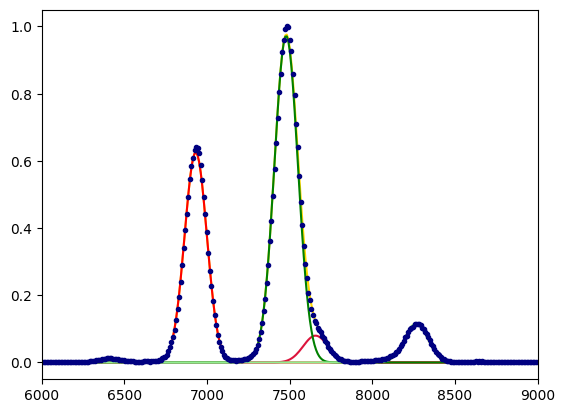

In [34]:
pop_sumI1, cov_sumI1= curve_fit(gauss_four, energias[720:910], Incog1[2][720:910], sigma=Incog1[3][720:910], p0=P0_incgo1)

gauss_Co_I1_1=[pop_sumI1[0], pop_sumI1[4], pop_sumI1[5]]
gauss_Co_I1_2=[pop_sumI1[1], rel_sigma_Co*pop_sumI1[4], rel_C_Co*pop_sumI1[5]]
gauss_Ni_I1_1=[pop_sumI1[2], pop_sumI1[6], pop_sumI1[7]]
gauss_Ni_I1_2=[pop_sumI1[3], rel_sigma_Ni*pop_sumI1[6], rel_C_Ni*pop_sumI1[7]]

plt.errorbar(energias, Incog1[2], fmt='.', color='navy')
plt.plot(energias, gauss_four(energias, *pop_sumI1), color='gold')
plt.plot(energias, gauss(energias, *gauss_Co_I1_1), color='red')
plt.plot(energias, gauss(energias, *gauss_Co_I1_2), color='crimson')
plt.plot(energias, gauss(energias, *gauss_Ni_I1_1), color='green')
plt.plot(energias, gauss(energias, *gauss_Ni_I1_2), color='lightgreen')
plt.xlim(6000,9000)